#### Sales Forecasting using ML for Retail Outlet (Walmart)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns
#import pandas_profiling


from datetime import datetime

import statsmodels.api as sm
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error, mean_squared_error

C:\Users\samee\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Data Pre-Processing 

In [2]:
train = pd.read_csv('data/train.csv')
feature = pd.read_csv('data/features.csv')
test = pd.read_csv('data/test.csv')
stores = pd.read_csv('data/stores.csv')


In [3]:
#! pip install xlsxwriter --user
#import xlsxwriter
# For Output_excel file...
#writer=pd.ExcelWriter('Walmart Store Sales Prediction output.xlsx', engine='xlsxwriter')

    Merging the DataSet 
      -(train+Store+Feature) 
      -(test+Store+Feature)

In [4]:
dataset = pd.merge(train,test, how='left')
train_bt = pd.merge(dataset,stores) 
dataset = pd.merge(train_bt,feature)

train, test = train_test_split(dataset, test_size=0.33)


In [5]:
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [6]:
train.head(5)          

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
278300,29,25,2010-06-11,6350.20,False,B,93638,65.01,2.830,NaN,NaN,NaN,NaN,NaN,132.435742,10.160
201063,21,34,2011-02-04,12992.80,False,B,140167,36.33,2.989,NaN,NaN,NaN,NaN,NaN,212.224065,8.028
288936,30,32,2011-01-07,9.83,False,C,42988,44.24,2.976,NaN,NaN,NaN,NaN,NaN,211.064888,8.028
237207,25,50,2010-02-12,1325.00,True,B,128107,19.64,2.773,NaN,NaN,NaN,NaN,NaN,204.385747,8.187
64599,7,35,2011-09-02,322.34,False,B,70713,53.40,3.511,NaN,NaN,NaN,NaN,NaN,194.509211,8.622


In [7]:
test.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
380580,40,34,2012-09-21,6243.70,False,A,155083,54.12,4.056,3688.63,7.64,NaN,693.23,4870.36,138.653400,4.156
53380,6,36,2011-04-29,3131.00,False,A,202505,75.27,3.810,NaN,NaN,NaN,NaN,NaN,217.184725,6.855
227246,24,19,2010-03-12,155.22,False,A,203819,42.31,2.938,NaN,NaN,NaN,NaN,NaN,131.784000,8.326
18495,2,17,2012-04-20,11741.15,False,A,202307,65.69,3.877,7311.02,2236.20,33.53,878.07,4080.32,221.202107,6.891
20123,2,1,2012-09-28,27159.07,False,A,202307,79.45,3.666,7106.05,1.91,1.65,1549.10,3946.03,222.616433,6.565


In [8]:
print( train.info())
print ("*****************************************")
print (test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282451 entries, 278300 to 234205
Data columns (total 16 columns):
Store           282451 non-null int64
Dept            282451 non-null int64
Date            282451 non-null object
Weekly_Sales    282451 non-null float64
IsHoliday       282451 non-null bool
Type            282451 non-null object
Size            282451 non-null int64
Temperature     282451 non-null float64
Fuel_Price      282451 non-null float64
MarkDown1       100597 non-null float64
MarkDown2       74198 non-null float64
MarkDown3       91538 non-null float64
MarkDown4       90125 non-null float64
MarkDown5       101092 non-null float64
CPI             282451 non-null float64
Unemployment    282451 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 34.7+ MB
None
*****************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 139119 entries, 380580 to 302949
Data columns (total 16 columns):
Store           139119

#### Data Description

##### 1. Training Data

In [9]:
numeric_var_train=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_train=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object']]
# Train Numerical Data
train_num=train[numeric_var_train]

# Train Categorical Data
train_cat=train[cat_var_train]
print (numeric_var_train)
print (cat_var_train)

['Dept', 'MarkDown3', 'Weekly_Sales', 'Unemployment', 'Size', 'MarkDown1', 'CPI', 'Store', 'MarkDown5', 'Temperature', 'Fuel_Price', 'MarkDown2', 'MarkDown4']
['Date', 'Type']


In [10]:
# Creating Data audit Report
# Use a general function that returns multiple values    
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' ,'P25' ,'P50' ,'P75' ,'MAX'])
 
num_summary=train_num.apply(lambda x: var_summary(x)).T
#num_summary.to_excel(writer,'Numeric_variable Summary',index=True)
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Dept,282451.0,0.0,1.249904e+07,44.252069,37.000000,30.467646,9.282775e+02,1.000,1.000000,4.000000,7.000000,18.0000,37.000000,74.000000,91.000000,95.000000,98.000000,99.000000
MarkDown3,91538.0,190913.0,1.313222e+08,1434.619986,24.730000,9570.293793,9.159052e+07,-29.100,0.060000,0.660000,1.660000,5.1000,24.730000,104.010000,400.090000,1065.700000,63143.290000,141630.610000
Weekly_Sales,282451.0,0.0,4.508562e+09,15962.279745,7587.510000,22753.954246,5.177424e+08,-4988.940,5.000000,60.005000,291.750000,2071.2150,7587.510000,20142.400000,42871.330000,61220.435000,106614.355000,693099.360000
Unemployment,282451.0,0.0,2.248957e+06,7.962289,7.866000,1.866761,3.484796e+00,3.879,4.156000,5.326000,5.965000,6.8910,7.866000,8.572000,9.816000,12.187000,14.180000,14.313000
Size,282451.0,0.0,3.864999e+10,136837.843552,140167.000000,60984.550925,3.719115e+09,34875.000,34875.000000,39690.000000,39910.000000,93638.0000,140167.000000,202505.000000,204184.000000,206302.000000,219622.000000,219622.000000
MarkDown1,100597.0,181854.0,7.278969e+08,7235.771013,5333.920000,8271.081420,6.841079e+07,0.270,18.000000,150.150000,377.290000,2232.0800,5333.920000,9199.630000,15282.470000,21823.530000,41524.030000,88646.760000
CPI,282451.0,0.0,4.834213e+07,171.152259,182.260441,39.170317,1.534314e+03,126.064,126.111903,126.496258,128.719935,131.9809,182.260441,212.416993,219.415986,221.941558,225.473509,227.232807
Store,282451.0,0.0,6.267269e+06,22.188872,22.000000,12.785003,1.634563e+02,1.000,1.000000,3.000000,5.000000,11.0000,22.000000,33.000000,40.000000,43.000000,45.000000,45.000000
MarkDown5,101092.0,181359.0,4.681598e+08,4631.027675,3359.450000,5954.989560,3.546190e+07,135.160,353.190000,719.560000,1073.060000,1878.4400,3359.450000,5563.800000,8346.740000,11311.240000,27754.230000,108519.280000
Temperature,282451.0,0.0,1.697926e+07,60.113987,62.110000,18.462734,3.408726e+02,-2.060,18.200000,27.260000,33.980000,46.7400,62.110000,74.290000,83.590000,87.270000,92.810000,100.140000


In [11]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=train_cat.apply(lambda x: cat_summary(x))
cat_summary

,Date,Type
N,282451,282451
NMISS,0,0
ColumnsNames,2011-12-09 2040 2012-07-20 2036 2011-09-...,A 144649 B 109454 C 28348 Name: Type...


##### 2. Testing Data

In [12]:
numeric_var_test=[key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_test=[key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['object']]
# Train Numerical Data
test_num=test[numeric_var_test]

# Train Categorical Data
test_cat=test[cat_var_test]
print (numeric_var_test)
print (cat_var_test)

['Dept', 'MarkDown3', 'Weekly_Sales', 'Unemployment', 'Size', 'MarkDown1', 'CPI', 'Store', 'MarkDown5', 'Temperature', 'Fuel_Price', 'MarkDown2', 'MarkDown4']
['Date', 'Type']


In [13]:
num_summary=test_num.apply(lambda x: var_summary(x)).T
num_summary.head()

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Dept,139119.0,0.0,6.159781e+06,44.277065,37.000,30.541652,9.327925e+02,1.000,1.000,4.000,7.000,18.000,37.000,74.000,92.000,95.000,98.000,99.000
MarkDown3,45553.0,93566.0,6.600947e+07,1449.069715,24.230,9728.380365,9.464138e+07,-29.100,0.090,0.650,1.650,5.070,24.230,103.340,399.770,1049.300,62095.850,141630.610
Weekly_Sales,139119.0,0.0,2.228657e+09,16019.789611,7670.210,22624.130739,5.118513e+08,-1098.000,5.000,59.009,290.400,2100.100,7670.210,20322.125,42789.904,61159.680,106078.237,420586.570
Unemployment,139119.0,0.0,1.106862e+06,7.956227,7.866,1.856242,3.445633e+00,3.879,4.156,5.326,5.965,6.891,7.866,8.567,9.816,12.187,14.180,14.313
Size,139119.0,0.0,1.899040e+10,136504.731122,140167.000,60972.136685,3.717601e+09,34875.000,34875.000,39690.000,39910.000,93638.000,140167.000,202505.000,204184.000,206302.000,219622.000,219622.000


In [14]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=test_cat.apply(lambda x: cat_summary(x))
cat_summary

,Date,Type
N,139119,139119
NMISS,0,0
ColumnsNames,2012-03-09 1041 2012-02-17 1033 2011-07-...,"A 70829 B 54041 C 14249 Name: Type, d..."


###### Correlation

In [15]:
train_corr=pd.DataFrame(train.corr())
train_corr.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.023763,-0.085588,0.000254,-0.182541,-0.049568,0.065346,-0.118268,-0.031903,-0.033373,-0.008558,-0.025730,-0.210557,0.208333
Dept,0.023763,1.000000,0.149094,0.001104,-0.002497,0.005623,0.004653,-0.004762,-0.003239,0.002054,0.001264,-0.003237,-0.006000,0.007008
Weekly_Sales,-0.085588,0.149094,1.000000,0.012568,0.243854,-0.002847,0.000602,0.083725,0.021070,0.058053,0.044691,0.089994,-0.020345,-0.025535
IsHoliday,0.000254,0.001104,0.012568,1.000000,-0.001324,-0.155507,-0.076816,-0.036192,0.336968,0.427584,-0.001082,-0.054551,-0.002625,0.009935
Size,-0.182541,-0.002497,0.243854,-0.001324,1.000000,-0.057323,0.004004,0.345783,0.105766,0.050833,0.168453,0.304870,-0.003546,-0.068159


In [16]:
test_corr=pd.DataFrame(test.corr())
test_corr.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.024490,-0.084399,-0.002179,-0.183564,-0.051167,0.065168,-0.122231,-0.041835,-0.027959,-0.012706,-0.028447,-0.212174,0.209008
Dept,0.024490,1.000000,0.145872,0.000535,-0.003915,0.002031,0.001380,0.002261,0.007454,0.001262,0.010263,0.006794,-0.010475,0.009526
Weekly_Sales,-0.084399,0.145872,1.000000,0.013205,0.243790,-0.001211,-0.001604,0.088347,0.030421,0.065076,0.046878,0.091120,-0.022106,-0.026533
IsHoliday,-0.002179,0.000535,0.013205,1.000000,0.004496,-0.156864,-0.081263,-0.034363,0.330453,0.428784,0.000481,-0.052051,-0.000541,0.011529
Size,-0.183564,-0.003915,0.243790,0.004496,1.000000,-0.060343,0.002076,0.345464,0.115063,0.045123,0.167695,0.303987,-0.002830,-0.068414


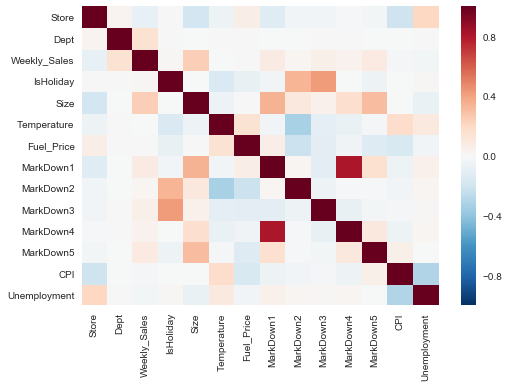

In [17]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(train.corr())
plt.show()

<big> -Markdowns are Highly Correlated.

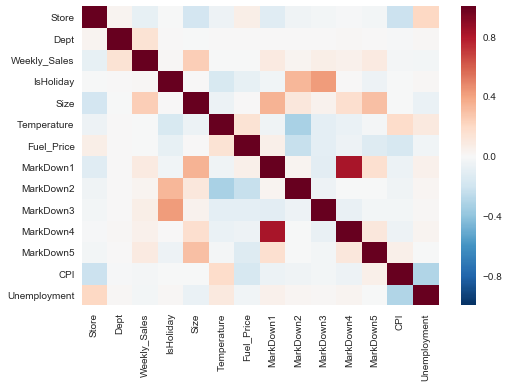

In [18]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(test.corr())
plt.show()

<big> -Markdown 4 is  Highly Correlated to Markdown 1

___

### Data Exploratory Analysis

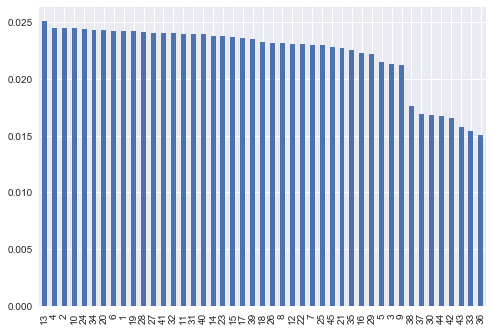

In [19]:
train['Store'].value_counts(normalize=True).plot(kind = 'bar',fig=(4,5))
plt.show()

<big> -The above graph shows that There are more number of Store 13 and very less number of Store 36

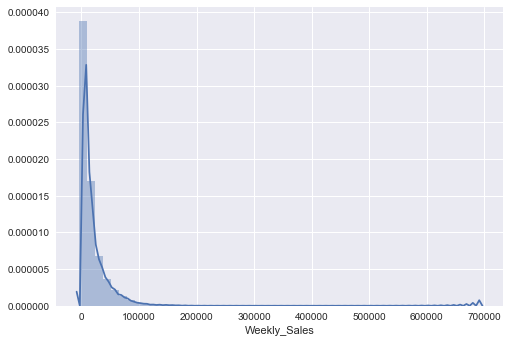

In [20]:
sns.distplot(train.Weekly_Sales)
plt.show()

###### Sales vs Type

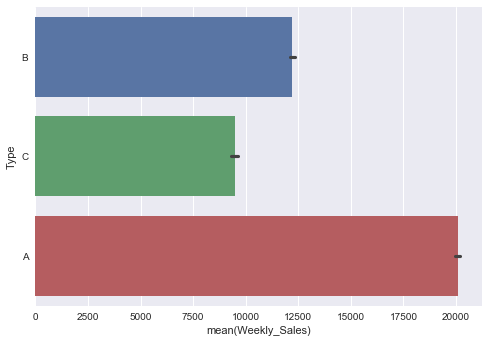

In [21]:
#tips = sns.load_dataset('train')
sns.barplot(x=train["Weekly_Sales"],y=train["Type"])
plt.show()

<big> From this plot, we notice that 'type C' stores have fewer sales and 'type A' stores have more sales in general.

#### Missing Value Treatment

In [22]:
print(train.isnull().sum())
print ("*"*30)
print (test.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       181854
MarkDown2       208253
MarkDown3       190913
MarkDown4       192326
MarkDown5       181359
CPI                  0
Unemployment         0
dtype: int64
******************************
Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1        89035
MarkDown2       102069
MarkDown3        93566
MarkDown4        94277
MarkDown5        88779
CPI                  0
Unemployment         0
dtype: int64


    Imputing it with its mean

In [23]:
test['CPI']=test.groupby(['Dept'])['CPI'].transform(lambda x: x.fillna(x.mean()))
test['Unemployment']=test.groupby(['Dept'])['Unemployment'].transform(lambda x: x.fillna(x.mean()))

C:\Users\samee\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\samee\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


    Other Missing Value Treatment like Markdown
    Imputing it with Zero(No Markdown)

In [24]:
train=train.fillna(0)
test=test.fillna(0)

<big> We can probably safely fill all missing values with zero. For the markdowns this means that there was no markdown. 

In [25]:
print (train.isnull().sum())
print ("*"*30)
print (test.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64
******************************
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64


###### Outlier Treatment

In [26]:
train.Weekly_Sales=np.where(train.Weekly_Sales>100000, 100000,train.Weekly_Sales)

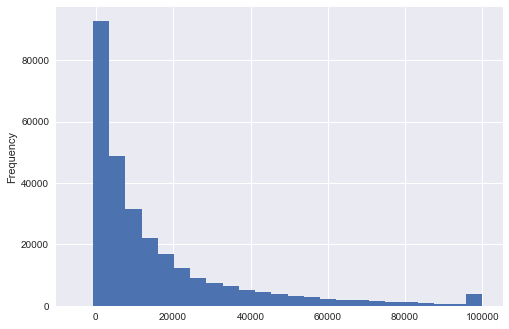

In [27]:
train.Weekly_Sales.plot.hist(bins=25)
plt.show()

_______________

### Feature Extraction
In this section, we select the appropriate features to train our classifier. Here, we create new features based on existing features. We also convert categorical features into numeric form.

###### Date Feature

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282451 entries, 35312 to 415917
Data columns (total 16 columns):
Store           282451 non-null int64
Dept            282451 non-null int64
Date            282451 non-null object
Weekly_Sales    282451 non-null float64
IsHoliday       282451 non-null bool
Type            282451 non-null object
Size            282451 non-null int64
Temperature     282451 non-null float64
Fuel_Price      282451 non-null float64
MarkDown1       282451 non-null float64
MarkDown2       282451 non-null float64
MarkDown3       282451 non-null float64
MarkDown4       282451 non-null float64
MarkDown5       282451 non-null float64
CPI             282451 non-null float64
Unemployment    282451 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 34.7+ MB


In [28]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [29]:
# Extract date features
train['Date_dayofweek'] =train['Date'].dt.dayofweek
train['Date_month'] =train['Date'].dt.month 
train['Date_year'] =train['Date'].dt.year
train['Date_day'] =train['Date'].dt.day 

test['Date_dayofweek'] =test['Date'].dt.dayofweek
test['Date_month'] =test['Date'].dt.month 
test['Date_year'] =test['Date'].dt.year
test['Date_day'] =test['Date'].dt.day 

In [30]:
print (train.Type.value_counts())
print ("*"*30)
print (test.Type.value_counts())

A    144649
B    109454
C     28348
Name: Type, dtype: int64
******************************
A    70829
B    54041
C    14249
Name: Type, dtype: int64


In [31]:
print (train.IsHoliday.value_counts())
print ("*"*30)
print (test.IsHoliday.value_counts())

False    262494
True      19957
Name: IsHoliday, dtype: int64
******************************
False    129415
True       9704
Name: IsHoliday, dtype: int64


In [32]:
train_test_data = [train, test]

    Converting Categorical Variable 'Type' into Numerical Variable 
    For A=1 , B=2, C=3

In [33]:
type_mapping = {"A": 1, "B": 2, "C": 3}
for dataset in train_test_data:
    dataset['Type'] = dataset['Type'].map(type_mapping)

    Converting Categorical Variable 'IsHoliday' into Numerical Variable 

In [34]:
type_mapping = {False: 0, True: 1}
for dataset in train_test_data:
    dataset['IsHoliday'] = dataset['IsHoliday'].map(type_mapping)

    Creating Extra Holiday Variable.
    If that week comes under extra holiday then 1(=Yes) else 2(=No)

Making New Holiday Variable Based on Given Data....

In [35]:
train['Super_Bowl'] = np.where((train['Date']==datetime(2010, 2, 12)) | (train['Date']==datetime(2011, 2, 11)) | (train['Date']==datetime(2012, 2, 10)) | (train['Date']==datetime(2013, 2, 8)),1,0)
train['Labour_Day'] = np.where((train['Date']==datetime(2010, 9, 10)) | (train['Date']==datetime(2011, 9, 9)) | (train['Date']==datetime(2012, 9, 7)) | (train['Date']==datetime(2013, 9, 6)),1,0)
train['Thanksgiving'] = np.where((train['Date']==datetime(2010, 11, 26)) | (train['Date']==datetime(2011, 11, 25)) | (train['Date']==datetime(2012, 11, 23)) | (train['Date']==datetime(2013, 11, 29)),1,0)
train['Christmas'] = np.where((train['Date']==datetime(2010, 12, 31)) | (train['Date']==datetime(2011, 12, 30)) | (train['Date']==datetime(2012, 12, 28)) | (train['Date']==datetime(2013, 12, 27)),1,0)
#........................................................................
test['Super_Bowl'] = np.where((test['Date']==datetime(2010, 2, 12)) | (test['Date']==datetime(2011, 2, 11)) | (test['Date']==datetime(2012, 2, 10)) | (test['Date']==datetime(2013, 2, 8)),1,0)
test['Labour_Day'] = np.where((test['Date']==datetime(2010, 9, 10)) | (test['Date']==datetime(2011, 9, 9)) | (test['Date']==datetime(2012, 9, 7)) | (test['Date']==datetime(2013, 9, 6)),1,0)
test['Thanksgiving'] = np.where((test['Date']==datetime(2010, 11, 26)) | (test['Date']==datetime(2011, 11, 25)) | (test['Date']==datetime(2012, 11, 23)) | (test['Date']==datetime(2013, 11, 29)),1,0)
test['Christmas'] = np.where((test['Date']==datetime(2010, 12, 31)) | (test['Date']==datetime(2011, 12, 30)) | (test['Date']==datetime(2012, 12, 28)) | (test['Date']==datetime(2013, 12, 27)),1,0)


In [36]:
# Altering the isHoliday value depending on these new holidays...
train['IsHoliday']=train['IsHoliday']|train['Super_Bowl']|train['Labour_Day']|train['Thanksgiving']|train['Christmas']
test['IsHoliday']=test['IsHoliday']|test['Super_Bowl']|test['Labour_Day']|test['Thanksgiving']|test['Christmas']

In [37]:
print (train.Christmas.value_counts())
print (train.Super_Bowl.value_counts())
print (train.Thanksgiving.value_counts())
print (train.Labour_Day.value_counts())

0    278445
1      4006
Name: Christmas, dtype: int64
0    276490
1      5961
Name: Super_Bowl, dtype: int64
0    278492
1      3959
Name: Thanksgiving, dtype: int64
0    276420
1      6031
Name: Labour_Day, dtype: int64


In [38]:
print (test.Christmas.value_counts())
print (test.Super_Bowl.value_counts())
print (test.Thanksgiving.value_counts())
print (test.Labour_Day.value_counts())

0    137179
1      1940
Name: Christmas, dtype: int64
0    136185
1      2934
Name: Super_Bowl, dtype: int64
0    137119
1      2000
Name: Thanksgiving, dtype: int64
0    136289
1      2830
Name: Labour_Day, dtype: int64


In [39]:
# Since we have Imputed IsHoliday according to Extra holidays..These extra holiday variable has redundant..
# Droping the Extra holiday variables because its redundant..
dp=['Super_Bowl','Labour_Day','Thanksgiving','Christmas']
train.drop(dp,axis=1,inplace=True)
test.drop(dp,axis=1,inplace=True)

### Feature Selection

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282451 entries, 35312 to 415917
Data columns (total 20 columns):
Store             282451 non-null int64
Dept              282451 non-null int64
Date              282451 non-null datetime64[ns]
Weekly_Sales      282451 non-null float64
IsHoliday         282451 non-null int64
Type              282451 non-null int64
Size              282451 non-null int64
Temperature       282451 non-null float64
Fuel_Price        282451 non-null float64
MarkDown1         282451 non-null float64
MarkDown2         282451 non-null float64
MarkDown3         282451 non-null float64
MarkDown4         282451 non-null float64
MarkDown5         282451 non-null float64
CPI               282451 non-null float64
Unemployment      282451 non-null float64
Date_dayofweek    282451 non-null int64
Date_month        282451 non-null int64
Date_year         282451 non-null int64
Date_day          282451 non-null int64
dtypes: datetime64[ns](1), float64(10), int64(9)
memory 

####    Droping irrelevant variable:
    -Since we have imputed markdown variables therefore we will not be removing the all markdown variables.
    -Removing MarkDown5 because its Highly Skewed

In [40]:
features_drop=['Unemployment','CPI','MarkDown5']
train=train.drop(features_drop, axis=1)
test=test.drop(features_drop, axis=1)

In [41]:
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Date_dayofweek,Date_month,Date_year,Date_day
278300,29,25,2010-06-11,6350.2,0,2,93638,65.01,2.830,0.0,0.0,0.0,0.0,4,6,2010,11
201063,21,34,2011-02-04,12992.8,0,2,140167,36.33,2.989,0.0,0.0,0.0,0.0,4,2,2011,4


In [42]:
test.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Date_dayofweek,Date_month,Date_year,Date_day
380580,40,34,2012-09-21,6243.7,0,1,155083,54.12,4.056,3688.63,7.64,0.0,693.23,4,9,2012,21
53380,6,36,2011-04-29,3131.0,0,1,202505,75.27,3.810,0.00,0.00,0.0,0.00,4,4,2011,29


In [35]:
# Converting all float var int integer..
#for var in train:
#    if train[var].dtypes == float:
#        train[var]=train[var].astype(int)
        
#for var in test:
#    if test[var].dtypes == float:
#test[var]=test[var].astype(int)

____

### Classification & Accuracy
    Define training and testing set

In [43]:
#### train X= Exery thing except Weekly_Sales
train_X=train.drop(['Weekly_Sales','Date'], axis=1)
#### train Y= Only Weekly_Sales 
train_y=train['Weekly_Sales'] 

#test_X=test.drop(['Weekly_Sales','Date'], axis=1)
test_X=test.drop(['Weekly_Sales','Date'], axis=1).copy()
test_y = test['Weekly_Sales']

print(train_X.shape, train_y.shape, test_X.shape,test_y.shape)

(282451, 15) (282451,) (139119, 15) (139119,)


In [44]:
import sklearn.metrics as sm
#round(sm.r2_score(test_y, y_pred_rf), 2)

### Building models & comparing their RMSE values

#### 1.Linear Regression

In [45]:
## Methood 1..
clf = LinearRegression()
clf.fit(train_X, train_y)
y_pred_linear=clf.predict(test_X)
#acc_linear=round( clf.score(y_pred_linear,test_y) * 100, 2)
#print ('score:'+str(acc_linear) + ' percent')
print("R2 score = ", round(sm.r2_score(test_y, y_pred_linear), 2))
print("Explained variance score =", round(sm.explained_variance_score(test_y, y_pred_linear), 2))




R2 score =  0.08
Explained variance score = 0.09


#### 2. Random Forest

In [46]:
clf = RandomForestRegressor(n_estimators=100)
clf.fit(train_X, train_y)
y_pred_rf=clf.predict(test_X)
print("R2 score =", round(sm.r2_score(test_y, y_pred_rf), 2))
print("Explained variance score =", round(sm.explained_variance_score(test_y, y_pred_rf), 2))
print("Accuracy : " ,(round(sm.r2_score(test_y, y_pred_rf), 2))*100, "percent")
#acc_rf= round(clf.score(train_X, train_y) * 100, 2)
#print ("Accuracy: " +str(acc_rf)+ 'percent')

R2 score = 0.93
Explained variance score = 0.93
Accuracy :  93.0 percent


 #### 3. Decision Tree

In [47]:
clf=DecisionTreeRegressor()
clf.fit(train_X, train_y)
y_pred_dt= clf.predict(test_X)
print("R2 score =", round(sm.r2_score(test_y, y_pred_dt), 2))
print("Explained variance score =", round(sm.explained_variance_score(test_y, y_pred_dt), 2))
print("Accuracy : " ,(round(sm.r2_score(test_y, y_pred_dt), 2))*100, "percent")
#acc_dt = round( clf.score(train_X, train_y) * 100, 2)
#print( "Accuracy: " +str(acc_dt) + ' percent')

R2 score = 0.91
Explained variance score = 0.91
Accuracy :  91.0 percent


#### 4. Gradient Boosting 

In [48]:
clf = GradientBoostingRegressor(n_estimators=100)
clf.fit(train_X, train_y)
y_pred_gb = clf.predict(test_X)
print("R2 score =", round(sm.r2_score(test_y, y_pred_gb), 2))
print("Explained variance score =", round(sm.explained_variance_score(test_y, y_pred_gb), 2))
print("Accuracy : " ,(round(sm.r2_score(test_y, y_pred_gb), 2))*100, "percent")
#acc_gb = round (clf.score(train_X, train_y)*100, 2)
#print("Accuracy: " +str(acc_gb)+ 'percent')


R2 score = 0.71
Explained variance score = 0.71
Accuracy :  71.0 percent


#### 5. AdaBoost

In [49]:
clf = AdaBoostRegressor()
clf.fit(train_X,train_y)
y_pred_ab = clf.predict(test_X)
print("R2 Score :" , round(sm.r2_score(test_y, y_pred_ab),2) )
print("Explained Variance Score : ", round(sm.explained_variance_score(test_y, y_pred_ab),2) )
print("Accuracy : ", (round(sm.r2_score(test_y, y_pred_ab),2))*100, "percent")

R2 Score : 0.24
Explained Variance Score :  0.44
Accuracy :  24.0 percent


In [50]:
acc_linear =  (round(sm.r2_score(test_y, y_pred_linear), 2))
acc_rf = (round(sm.r2_score(test_y, y_pred_rf), 2))
acc_dt = (round(sm.r2_score(test_y, y_pred_dt), 2))
acc_gb = (round(sm.r2_score(test_y, y_pred_gb), 2))
acc_ab = (round(sm.r2_score(test_y, y_pred_ab),2))

#### Comparing Models
Let's compare the accuracy score of all the regression models used above.

In [51]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest','Decision Tree', 'Gradient Boosting', 'AdaBoost'],
    
    'Score': [acc_linear, acc_rf,acc_dt, acc_gb, acc_ab]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,93.0
2,Decision Tree,91.0
3,Gradient Boosting,71.0
4,AdaBoost,24.0
0,Linear Regression,8.0


**Predicting Sales value for test data based on highest score model.**

In [74]:
# Prediction value using Random Forest model..
submission = pd.DataFrame({
        "Store" : test.Store.astype(str),
        "Dept" :  test.Dept.astype(str),
        "Date": test.Date.astype(str),
        "Weekly_Sales": y_pred_rf
    })

submission["Date"] = pd.to_datetime(submission["Date"])

submission = submission.sort_values(by="Date")

submission["Store_Dept_Date"] = submission["Store"].astype(str) + '_' + submission["Dept"].astype(str) + '_' + submission["Date"].astype(str)


In [75]:
submission.head()

,Date,Dept,Store,Weekly_Sales,Store_Dept_Date
107903,2010-02-05,3,12,15480.1845,12_3_2010-02-05
330790,2010-02-05,34,35,31877.7780,35_34_2010-02-05
117654,2010-02-05,52,13,5097.8980,13_52_2010-02-05
157470,2010-02-05,7,17,12215.4300,17_7_2010-02-05
187390,2010-02-05,71,20,13604.4327,20_71_2010-02-05


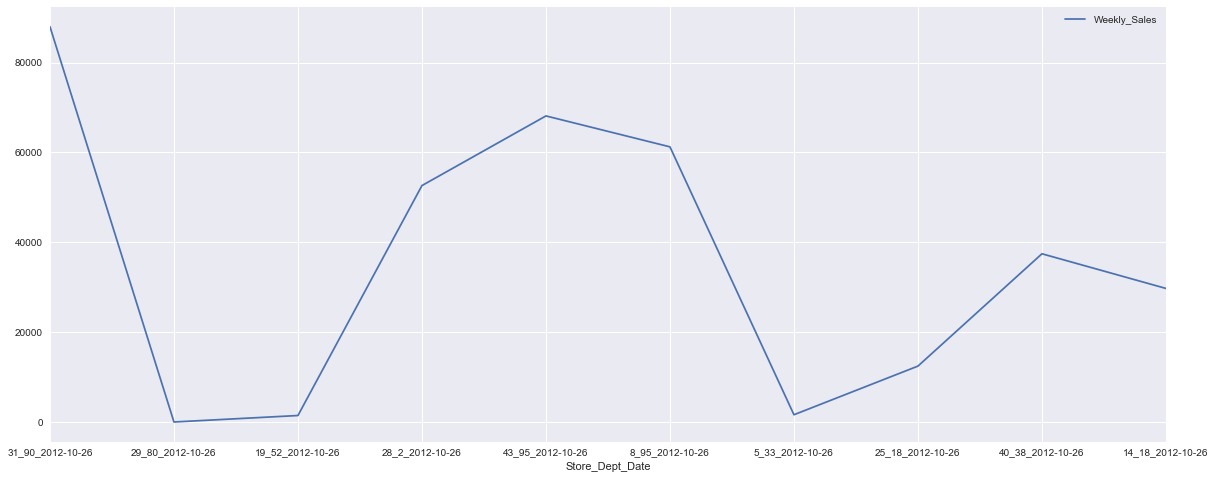

In [80]:
submission.tail(10).plot(x='Store_Dept_Date', y='Weekly_Sales',figsize=(20,8), kind='line')
plt.savefig("Walmart_Predict_RF.jpg")
plt.show()


    ************* THE END **************************************************************************************************